# Starting notebook SEN124A Project - Mississippi

You can use this notebook as a start for your network analysis with python/networkx

In [355]:
# Import Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
import math

In [356]:
# Read in the excel file 'mississippi.xlsx' as a dataframe
mississippi_network = pd.read_excel('distance_state.xlsx')
# Show contents of the dataframe
mississippi_network

,weight,0,b,Distance
0,1,Washington,Oregon,160
1,1,Washington,California,693
2,1,California,Oregon,536
3,1,California,Nevada,130
4,1,California,Arizona,755
...,...,...,...,...
67,1,Wisconsin,Illinois,264
68,1,Illinois,Indiana,208
69,1,Michigan,Illinois,391
70,1,Ohio,Michigan,254


DiGraph with 29 nodes and 72 edges


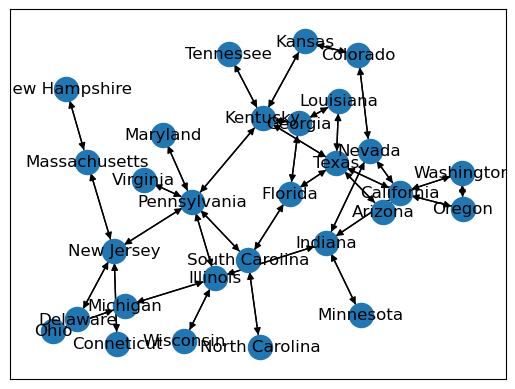

In [357]:
# Make a graph from the dataframe
Mississippi_Graph= nx.from_pandas_edgelist(mississippi_network, 0, 'b', edge_attr='Distance')
Mississippi_Graph = Mississippi_Graph.to_directed(as_view=False)
nx.draw_networkx(Mississippi_Graph,with_labels=True)
print(Mississippi_Graph)

In [358]:
#create a new node attribute "warehouse size"
whs = []
nx.set_node_attributes(Mississippi_Graph, whs, "warehouse size")

#Set the data per new node for the attribute "warehouse size"
Mississippi_Graph.nodes["Arizona"]["warehouse size"] = 3210500
Mississippi_Graph.nodes["California"]["warehouse size"] = 14123800
Mississippi_Graph.nodes["Colorado"]["warehouse size"] = 1000000
Mississippi_Graph.nodes["Conneticut"]["warehouse size"] = 14123800
Mississippi_Graph.nodes["Delaware"]["warehouse size"] = 1000200
Mississippi_Graph.nodes["Florida"]["warehouse size"] = 4890000
Mississippi_Graph.nodes["Georgia"]["warehouse size"] = 1385000
Mississippi_Graph.nodes["Indiana"]["warehouse size"] = 5450000
Mississippi_Graph.nodes["Illinois"]["warehouse size"] = 6012000
Mississippi_Graph.nodes["Kansas"]["warehouse size"] = 2120000
Mississippi_Graph.nodes["Kentucky"]["warehouse size"] = 5145000
Mississippi_Graph.nodes["Maryland"]["warehouse size"] = 2300000
Mississippi_Graph.nodes["Massachusetts"]["warehouse size"] = 1000000
Mississippi_Graph.nodes["Michigan"]["warehouse size"] = 1000000
Mississippi_Graph.nodes["Minnesota"]["warehouse size"] = 820000
Mississippi_Graph.nodes["Nevada"]["warehouse size"] = 2150000
Mississippi_Graph.nodes["New Hampshire"]["warehouse size"] = 63800
Mississippi_Graph.nodes["New Jersey"]["warehouse size"] = 2260000
Mississippi_Graph.nodes["North Carolina"]["warehouse size"] = 397800
Mississippi_Graph.nodes["Ohio"]["warehouse size"] = 1855000
Mississippi_Graph.nodes["Oregon"]["warehouse size"] = 855000
Mississippi_Graph.nodes["Pennsylvania"]["warehouse size"] = 8350000
Mississippi_Graph.nodes["South Carolina"]["warehouse size"] = 2340000
Mississippi_Graph.nodes["Tennessee"]["warehouse size"] = 3680000
Mississippi_Graph.nodes["Texas"]["warehouse size"] = 8834000
Mississippi_Graph.nodes["Virginia"]["warehouse size"] = 2300000
Mississippi_Graph.nodes["Washington"]["warehouse size"] = 2280000
Mississippi_Graph.nodes["Wisconsin"]["warehouse size"] = 1100000
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 50000000

In [359]:
Mississippi_Graph.nodes["Pennsylvania"]["warehouse size"] = 50000000
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 8350000

More information about Graph operations can be found in the NetworkX documentation:
https://networkx.github.io/documentation/stable/index.html

For example, this is the documentation on calculating the edge betweenness centrality:
https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html#networkx.algorithms.centrality.edge_betweenness_centrality

In [360]:
def entropic_degree(graph, weight):
    out = defaultdict(dict)
    out2 = defaultdict(dict)
    out3 = defaultdict(dict)
    out4 = defaultdict(dict)
    df = pd.DataFrame(columns=['Node'])
    d = {}
    e = {}
    f = {}
    g = {}
    global h
    for i2 in list(graph):
        for i3 in list(graph.neighbors(i2)):
            distance = graph[i2][i3][weight]
            out[i2][i3] = distance
    for i2 in list(graph):
        key = str(i2)
        d[key] = sum(out[i2].values())
    for i2 in list(graph):
        for i3 in list(graph.neighbors(i2)):
            pij = out[i2][i3] / d[i2]
            log_pij = math.log10(pij)
            pij_multiplied_log_pij = pij * log_pij
            out2[i2][i3] = pij_multiplied_log_pij
    for i2 in list(graph):
        key = str(i2)
        e[key] = sum(out2[i2].values())
    for i2 in list(graph):
        key = str(i2)
        f[key] = 1 - e[key]
    for i2 in list(graph):
        key = str(i2)
        g[key] = d[key] * f[key]
    
    h = pd.DataFrame.from_dict(g, orient='index',)
    h.rename(columns = {0: 'Entropic_Degree'}, inplace = True)
    h.sort_values(by=['Entropic_Degree'], ascending=False, inplace=True)
    return h

In [361]:
def demand_adjusted_entropic_degree(graph, weight, demand):
    a = entropic_degree(graph, weight)
    j = {}
    l = {}
    for i in list(graph):
        key = str(i)
        j[key] = Mississippi_Graph.nodes[i][demand]
    highest = max(j.values())
    for i in list(graph):
        key = str(i)
        j[key] = Mississippi_Graph.nodes[i][demand]
        for k in a.index:
            if k == key:
                l[key] = (a['Entropic_Degree'][k] / 2) * (1 + (j[key]/highest))
    m = (pd.DataFrame.from_dict(l, orient='index').rename_axis('State').reset_index())
    m.rename(columns = {0: 'Demand_Adjusted_Entropic_Degree'}, inplace = True)
    m.sort_values(by=['Demand_Adjusted_Entropic_Degree'], ascending=False, inplace=True)
    return m

In [362]:
def closeness_centrality(graph,weight):
    c = list(graph.nodes)
    df = pd.DataFrame(columns=['State','Closeness_centrality'])
    for i in c:
        a = nx.closeness_centrality(graph,i,weight)
        new_row = {'State': i, 'Closeness_centrality': a}
        df = df.append(new_row, ignore_index=True)
    df.sort_values(by=['Closeness_centrality'], ascending=False, inplace=True)
    return df

In [363]:
def shortest_path(graph,location,weight):
    df3 = pd.DataFrame(columns=['State','Shortest_path_to_production_facility'])
    b = nx.shortest_path_length(graph,location,weight=weight)
    for i in b:
        new_row = {'State': i, 'Shortest_path_to_production_facility': b[i]}
        df3 = df3.append(new_row, ignore_index=True)
    df3.sort_values(by=['Shortest_path_to_production_facility'], ascending=False, inplace=True)
    return df3

In [364]:
def shortest_path_product1(graph,location,weight,demand):
    df4 = pd.DataFrame(columns=['State','Shortest_path_to_production_facility','Warehouse_size','Total_distance'])
    b = nx.shortest_path_length(graph,location,weight=weight)
    for i in b:
        new_row = {'State': i, 'Shortest_path_to_production_facility': b[i], 'Warehouse_size': Mississippi_Graph.nodes[i][demand], 'Total_distance': b[i]*Mississippi_Graph.nodes[i][demand]}
        df4 = df4.append(new_row, ignore_index=True)
    df4.sort_values(by=['Shortest_path_to_production_facility'], ascending=False, inplace=True)
    return df4

In [365]:
def shortest_path_product2(graph,location,weight,demand):
    df4 = pd.DataFrame(columns=['State','Shortest_path_to_production_facility','Warehouse_size','Total_distance'])
    b = nx.shortest_path_length(graph,location,weight=weight)
    for i in b:
        new_row = {'State': i, 'Shortest_path_to_production_facility': b[i], 'Warehouse_size': Mississippi_Graph.nodes[i][demand], 'Total_distance': b[i]*Mississippi_Graph.nodes[i][demand]}
        df4 = df4.append(new_row, ignore_index=True)
    df4.sort_values(by=['Shortest_path_to_production_facility'], ascending=False, inplace=True)
    return df4['Total_distance'].sum()/df4['Warehouse_size'].sum()


In [366]:
def average_shortest_path(graph,location,weight):
    b = nx.shortest_path_length(graph,location,weight=weight)
    average_shortest_path = sum(b.values()) / (len(b) - 1)
    return average_shortest_path

In [367]:
def betweenness_centrality(graph, weight):
    df1 = pd.DataFrame(columns=['State','Betweenness_centrality'])
    d = nx.betweenness_centrality(graph,weight=weight)
    for i in d:
        new_row = {'State': i, 'Betweenness_centrality': d[i]}
        df1 = df1.append(new_row, ignore_index=True)
    df1.sort_values(by=['Betweenness_centrality'], ascending=False, inplace=True)
    return df1

In [368]:
def metrics_graph(graph,weight,demand,location):
    c = closeness_centrality(graph,weight)
    b = shortest_path(graph,location,weight)
    e = average_shortest_path(graph,location,weight)
    d = betweenness_centrality(graph, weight)
    a = demand_adjusted_entropic_degree(graph, weight, demand)
    g = shortest_path_product1(graph,location,weight,demand)
    h = shortest_path_product2(graph,location,weight,demand)
    
    print('Closeness centrality for all nodes:')
    display(c)
    print('Shortest path to production center:')
    display(b)
    print('Average shortest path to production center:')
    display(e)
    print('Betweenness centrality for all nodes:')
    display(d)
    print('Demand adjusted entropic degree for all nodes:')
    display(a)
    display(g)
    print("Total distance per product=")
    display(h)
    
    f = pd.merge(pd.merge(c,d,on='State'),a,on='State')
    f['Combined_metric'] = f['Closeness_centrality'] * f['Betweenness_centrality'] * f['Demand_Adjusted_Entropic_Degree']
    f.sort_values(by=['Combined_metric'], ascending=False, inplace=True)
    display(f)
    
    import warnings
    warnings.filterwarnings("ignore")

In [369]:
metrics_graph(graph=Mississippi_Graph,weight='Distance',demand='warehouse size',location='Louisiana')


Closeness centrality for all nodes:


,State,Closeness_centrality
14,Pennsylvania,0.000814
9,Kentucky,0.000774
18,New Jersey,0.000760
16,Maryland,0.000748
20,Delaware,0.000703
17,Virginia,0.000694
19,Conneticut,0.000672
10,Tennessee,0.000669
12,South Carolina,0.000669
25,Illinois,0.000665


Shortest path to production center:


,State,Shortest_path_to_production_facility
28,Minnesota,3034
27,Ohio,2889
26,Washington,2885
25,Oregon,2728
24,Michigan,2635
23,Wisconsin,2508
22,Indiana,2452
21,Nevada,2322
20,Illinois,2244
19,California,2192


Average shortest path to production center:


1826.9642857142858

Betweenness centrality for all nodes:


,State,Betweenness_centrality
14,Pennsylvania,0.576720
9,Kentucky,0.404762
25,Illinois,0.298942
18,New Jersey,0.267196
2,California,0.174603
13,Kansas,0.174603
3,Nevada,0.171958
23,Colorado,0.129630
6,Indiana,0.124339
12,South Carolina,0.108466


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
2,California,6477.543915
5,Texas,5023.069451
6,Indiana,4140.262353
14,Pennsylvania,3942.749267
9,Kentucky,2601.372566
3,Nevada,2214.239695
25,Illinois,1397.098262
4,Arizona,1216.949336
8,Florida,1158.102446
23,Colorado,1000.317272


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
28,Minnesota,3034,820000,2487880000
27,Ohio,2889,1855000,5359095000
26,Washington,2885,2280000,6577800000
25,Oregon,2728,855000,2332440000
24,Michigan,2635,1000000,2635000000
23,Wisconsin,2508,1100000,2758800000
22,Indiana,2452,5450000,13363400000
21,Nevada,2322,2150000,4992300000
20,Illinois,2244,6012000,13490928000
19,California,2192,14123800,30959369600


Total distance per product=


1538.5746688180084

,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
0,Pennsylvania,0.000814,0.576720,3942.749267,1.850333
1,Kentucky,0.000774,0.404762,2601.372566,0.814831
25,California,0.000427,0.174603,6477.543915,0.482736
13,Indiana,0.000619,0.124339,4140.262353,0.318667
9,Illinois,0.000665,0.298942,1397.098262,0.277687
20,Texas,0.000538,0.082011,5023.069451,0.221480
24,Nevada,0.000436,0.171958,2214.239695,0.166137
2,New Jersey,0.000760,0.267196,573.837256,0.116592
15,Kansas,0.000603,0.174603,786.630322,0.082779
21,Colorado,0.000503,0.129630,1000.317272,0.065257


# PART 2 MINIMAL DISTRIBUTION NETWORK WITH PRODUCTION NODE LOUISIANA

In [370]:
Mississippi_Graph2= nx.from_pandas_edgelist(mississippi_network, 0, 'b', edge_attr='Distance' )
a = nx.minimum_spanning_tree(Mississippi_Graph2, weight='Distance', algorithm='kruskal', ignore_nan=False)


DiGraph with 29 nodes and 56 edges


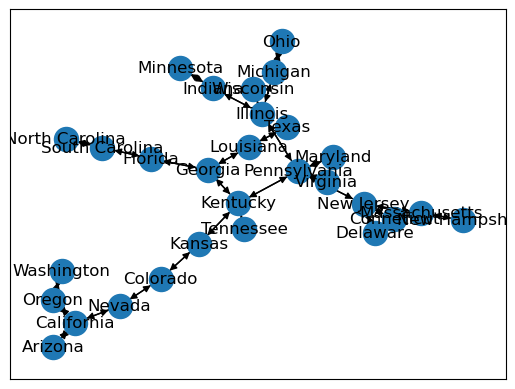

In [371]:
bb = a.to_directed(as_view=False)
nx.draw_networkx(bb,with_labels=True)
print(bb)

In [372]:
metrics_graph(graph=bb,weight='Distance',demand='warehouse size',location='Louisiana')

Closeness centrality for all nodes:


,State,Closeness_centrality
9,Kentucky,0.000748
14,Pennsylvania,0.000737
18,New Jersey,0.000693
16,Maryland,0.000682
10,Tennessee,0.000649
20,Delaware,0.000645
17,Virginia,0.000637
11,Georgia,0.000631
19,Conneticut,0.000618
13,Kansas,0.000599


Shortest path to production center:


,State,Shortest_path_to_production_facility
28,Arizona,3969
27,Washington,3910
26,Oregon,3750
25,California,3214
24,Nevada,3084
23,Minnesota,3034
22,Ohio,2889
21,Michigan,2635
20,Wisconsin,2508
19,Indiana,2452


Average shortest path to production center:


2054.0714285714284

Betweenness centrality for all nodes:


,State,Betweenness_centrality
9,Kentucky,0.664021
14,Pennsylvania,0.656085
13,Kansas,0.349206
25,Illinois,0.325397
11,Georgia,0.320106
23,Colorado,0.304233
18,New Jersey,0.267196
3,Nevada,0.253968
2,California,0.203704
8,Florida,0.137566


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
14,Pennsylvania,2808.545510
9,Kentucky,1560.525106
25,Illinois,1397.098262
2,California,1276.282457
23,Colorado,1000.317272
11,Georgia,896.080697
13,Kansas,786.630322
7,Louisiana,726.096125
3,Nevada,675.150957
18,New Jersey,573.837256


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
28,Arizona,3969,3210500,12742474500
27,Washington,3910,2280000,8914800000
26,Oregon,3750,855000,3206250000
25,California,3214,14123800,45393893200
24,Nevada,3084,2150000,6630600000
23,Minnesota,3034,820000,2487880000
22,Ohio,2889,1855000,5359095000
21,Michigan,2635,1000000,2635000000
20,Wisconsin,2508,1100000,2758800000
19,Indiana,2452,5450000,13363400000


Total distance per product=


1721.1839743705093

,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
1,Pennsylvania,0.000737,0.656085,2808.545510,1.357487
0,Kentucky,0.000748,0.664021,1560.525106,0.774849
13,Illinois,0.000552,0.325397,1397.098262,0.250869
7,Georgia,0.000631,0.320106,896.080697,0.181037
9,Kansas,0.000599,0.349206,786.630322,0.164489
14,Colorado,0.000501,0.304233,1000.317272,0.152328
2,New Jersey,0.000693,0.267196,573.837256,0.106214
25,California,0.000361,0.203704,1276.282457,0.093954
24,Nevada,0.000375,0.253968,675.150957,0.064228
12,Florida,0.000556,0.137566,438.190976,0.033511


# PART 2 MINIMAL DISTRIBUTION NETWORK WITH PRODUCTION NODE PENNSYLVANIA

In [373]:
Mississippi_Graph.nodes["Pennsylvania"]["warehouse size"] = 50000000
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 8350000
metrics_graph(graph=bb,weight='Distance',demand='warehouse size',location='Pennsylvania')

Closeness centrality for all nodes:


,State,Closeness_centrality
9,Kentucky,0.000748
14,Pennsylvania,0.000737
18,New Jersey,0.000693
16,Maryland,0.000682
10,Tennessee,0.000649
20,Delaware,0.000645
17,Virginia,0.000637
11,Georgia,0.000631
19,Conneticut,0.000618
13,Kansas,0.000599


Shortest path to production center:


,State,Shortest_path_to_production_facility
28,Arizona,3598
27,Washington,3539
26,Oregon,3379
25,California,2843
24,Nevada,2713
23,Texas,1927
22,North Carolina,1812
21,Colorado,1723
20,South Carolina,1585
19,Minnesota,1539


Average shortest path to production center:


1357.392857142857

Betweenness centrality for all nodes:


,State,Betweenness_centrality
9,Kentucky,0.664021
14,Pennsylvania,0.656085
13,Kansas,0.349206
25,Illinois,0.325397
11,Georgia,0.320106
23,Colorado,0.304233
18,New Jersey,0.267196
3,Nevada,0.253968
2,California,0.203704
8,Florida,0.137566


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
14,Pennsylvania,2808.545510
9,Kentucky,1560.525106
25,Illinois,1397.098262
2,California,1276.282457
23,Colorado,1000.317272
11,Georgia,896.080697
13,Kansas,786.630322
7,Louisiana,726.096125
3,Nevada,675.150957
18,New Jersey,573.837256


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
28,Arizona,3598,3210500,11551379000
27,Washington,3539,2280000,8068920000
26,Oregon,3379,855000,2889045000
25,California,2843,14123800,40153963400
24,Nevada,2713,2150000,5832950000
23,Texas,1927,8834000,17023118000
22,North Carolina,1812,397800,720813600
21,Colorado,1723,1000000,1723000000
20,South Carolina,1585,2340000,3708900000
19,Minnesota,1539,820000,1261980000


Total distance per product=


943.9459365434177

,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
1,Pennsylvania,0.000737,0.656085,2808.545510,1.357487
0,Kentucky,0.000748,0.664021,1560.525106,0.774849
13,Illinois,0.000552,0.325397,1397.098262,0.250869
7,Georgia,0.000631,0.320106,896.080697,0.181037
9,Kansas,0.000599,0.349206,786.630322,0.164489
14,Colorado,0.000501,0.304233,1000.317272,0.152328
2,New Jersey,0.000693,0.267196,573.837256,0.106214
25,California,0.000361,0.203704,1276.282457,0.093954
24,Nevada,0.000375,0.253968,675.150957,0.064228
12,Florida,0.000556,0.137566,438.190976,0.033511


In [374]:
metrics_graph(graph=bb,weight='Distance',demand='warehouse size',location='Pennsylvania')

Closeness centrality for all nodes:


,State,Closeness_centrality
9,Kentucky,0.000748
14,Pennsylvania,0.000737
18,New Jersey,0.000693
16,Maryland,0.000682
10,Tennessee,0.000649
20,Delaware,0.000645
17,Virginia,0.000637
11,Georgia,0.000631
19,Conneticut,0.000618
13,Kansas,0.000599


Shortest path to production center:


,State,Shortest_path_to_production_facility
28,Arizona,3598
27,Washington,3539
26,Oregon,3379
25,California,2843
24,Nevada,2713
23,Texas,1927
22,North Carolina,1812
21,Colorado,1723
20,South Carolina,1585
19,Minnesota,1539


Average shortest path to production center:


1357.392857142857

Betweenness centrality for all nodes:


,State,Betweenness_centrality
9,Kentucky,0.664021
14,Pennsylvania,0.656085
13,Kansas,0.349206
25,Illinois,0.325397
11,Georgia,0.320106
23,Colorado,0.304233
18,New Jersey,0.267196
3,Nevada,0.253968
2,California,0.203704
8,Florida,0.137566


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
14,Pennsylvania,2808.545510
9,Kentucky,1560.525106
25,Illinois,1397.098262
2,California,1276.282457
23,Colorado,1000.317272
11,Georgia,896.080697
13,Kansas,786.630322
7,Louisiana,726.096125
3,Nevada,675.150957
18,New Jersey,573.837256


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
28,Arizona,3598,3210500,11551379000
27,Washington,3539,2280000,8068920000
26,Oregon,3379,855000,2889045000
25,California,2843,14123800,40153963400
24,Nevada,2713,2150000,5832950000
23,Texas,1927,8834000,17023118000
22,North Carolina,1812,397800,720813600
21,Colorado,1723,1000000,1723000000
20,South Carolina,1585,2340000,3708900000
19,Minnesota,1539,820000,1261980000


Total distance per product=


943.9459365434177

,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
1,Pennsylvania,0.000737,0.656085,2808.545510,1.357487
0,Kentucky,0.000748,0.664021,1560.525106,0.774849
13,Illinois,0.000552,0.325397,1397.098262,0.250869
7,Georgia,0.000631,0.320106,896.080697,0.181037
9,Kansas,0.000599,0.349206,786.630322,0.164489
14,Colorado,0.000501,0.304233,1000.317272,0.152328
2,New Jersey,0.000693,0.267196,573.837256,0.106214
25,California,0.000361,0.203704,1276.282457,0.093954
24,Nevada,0.000375,0.253968,675.150957,0.064228
12,Florida,0.000556,0.137566,438.190976,0.033511


# PART 2 MINIMAL DISTRIBUTION NETWORK WITH ADDED NODES AND PRODUCTION NODE LOUISIANA

In [375]:
Mississippi_Graph.nodes["Pennsylvania"]["warehouse size"] = 8350000
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 50000000
huge_network = pd.read_excel('all_distances2.xlsx')
# Show contents of the dataframe
huge_network

,0,b1,Distance,b2
0,Washington,New York,2907.6,New York
1,Washington,Maryland,2811.0,Maryland
2,Washington,Georgia,2688.8,Georgia
3,Washington,Maine,3234.6,Maine
4,Washington,Texas,2249.1,Texas
...,...,...,...,...
1445,Wisconsin,New Mexico,1352.2,New Mexico
1446,Wisconsin,Illinois,273.1,Illinois
1447,Wisconsin,Florida,1124.9,Florida
1448,Wisconsin,Kansas,543.4,Kansas


In [376]:
huge_network['b1'] = huge_network['b2']
huge_network.rename(columns={"b1":"b"},inplace=True)
huge_network.drop(huge_network.columns[[3]], axis=1, inplace=True)
huge_network

,0,b,Distance
0,Washington,New York,2907.6
1,Washington,Maryland,2811.0
2,Washington,Georgia,2688.8
3,Washington,Maine,3234.6
4,Washington,Texas,2249.1
...,...,...,...
1445,Wisconsin,New Mexico,1352.2
1446,Wisconsin,Illinois,273.1
1447,Wisconsin,Florida,1124.9
1448,Wisconsin,Kansas,543.4


In [377]:
huge_network2 = huge_network.copy()

In [378]:
huge_network2

,0,b,Distance
0,Washington,New York,2907.6
1,Washington,Maryland,2811.0
2,Washington,Georgia,2688.8
3,Washington,Maine,3234.6
4,Washington,Texas,2249.1
...,...,...,...
1445,Wisconsin,New Mexico,1352.2
1446,Wisconsin,Illinois,273.1
1447,Wisconsin,Florida,1124.9
1448,Wisconsin,Kansas,543.4


In [379]:
for i in range(len(huge_network)):
    if huge_network.iloc[i,1] == 'Connecticut':
        huge_network.iloc[i,1] = 'Conneticut'

In [380]:
for i in range(len(huge_network)):        
    if huge_network.iloc[i,0] == 'Connecticut':
        huge_network.iloc[i,0] = 'Conneticut'

In [381]:
huge_network2 = huge_network.copy()

In [382]:
c = list(Mississippi_Graph.nodes)
l2 = []
for i in range(len(huge_network)):
    if huge_network.iloc[i,1] not in c:
        l2.append(i)
for i in range(len(huge_network)):
    if huge_network.iloc[i,1] == huge_network.iloc[i,0]:
        l2.append(i)

In [383]:
joinedlist = l2

In [384]:
huge_network2.drop(huge_network2.index[joinedlist], inplace=True)

Graph with 29 nodes and 406 edges


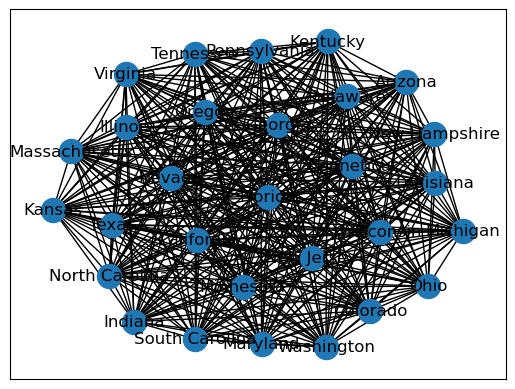

In [385]:
Huge_Graph = nx.from_pandas_edgelist(huge_network2, 0, 'b', edge_attr='Distance')
nx.draw_networkx(Huge_Graph,with_labels=True)
print(Huge_Graph)

DiGraph with 29 nodes and 56 edges


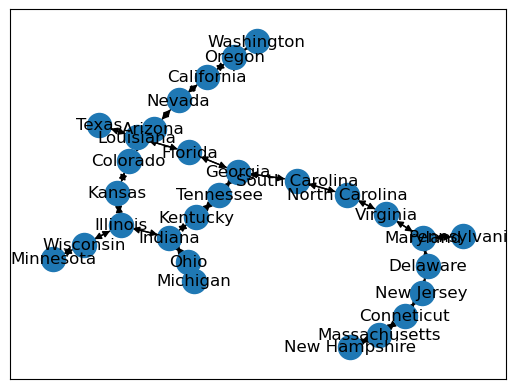

In [386]:
a = nx.minimum_spanning_tree(Huge_Graph, weight='Distance', algorithm='kruskal', ignore_nan=False)
a = a.to_directed(as_view=False)
nx.draw_networkx(a,with_labels=True)
print(a)

In [387]:
metrics_graph(graph=a,weight='Distance',demand='warehouse size',location='Louisiana')

Closeness centrality for all nodes:


,State,Closeness_centrality
18,Tennessee,0.000754
12,Kentucky,0.000750
2,Georgia,0.000749
15,Indiana,0.000740
7,South Carolina,0.000712
25,Illinois,0.000704
20,North Carolina,0.000670
8,Ohio,0.000660
26,Florida,0.000640
21,Virginia,0.000635


Shortest path to production center:


,State,Shortest_path_to_production_facility
28,Washington,4859.1
27,Oregon,4700.7
26,California,4164.6
25,Nevada,4033.9
24,Arizona,3294.4
23,Colorado,2475.8
22,Minnesota,2082.0
21,New Hampshire,2020.9
20,Massachusetts,1952.3
19,Kansas,1930.6


Average shortest path to production center:


1959.3571428571431

Betweenness centrality for all nodes:


,State,Betweenness_centrality
2,Georgia,0.595238
15,Indiana,0.560847
18,Tennessee,0.518519
12,Kentucky,0.515873
25,Illinois,0.489418
7,South Carolina,0.452381
20,North Carolina,0.423280
21,Virginia,0.388889
1,Maryland,0.362434
27,Kansas,0.349206


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
4,Louisiana,1133.634989
19,Arizona,1078.184392
10,Colorado,898.804728
25,Illinois,706.553115
27,Kansas,618.951777
2,Georgia,560.289340
6,Nevada,537.186470
22,California,519.463290
26,Florida,510.770504
15,Indiana,460.449414


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
28,Washington,4859.1,2280000,11078748000.0
27,Oregon,4700.7,855000,4019098500.0
26,California,4164.6,14123800,58819977480.000008
25,Nevada,4033.9,2150000,8672885000.0
24,Arizona,3294.4,3210500,10576671200.0
23,Colorado,2475.8,1000000,2475800000.0
22,Minnesota,2082.0,820000,1707240000.0
21,New Hampshire,2020.9,63800,128933420.0
20,Massachusetts,1952.3,1000000,1952300000.0
19,Kansas,1930.6,2120000,4092872000.0


Total distance per product=


1314.7899973274843

,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
2,Georgia,0.000749,0.595238,560.289340,0.249877
5,Illinois,0.000704,0.489418,706.553115,0.243515
3,Indiana,0.000740,0.560847,460.449414,0.191131
19,Colorado,0.000513,0.304233,898.804728,0.140166
10,Kansas,0.000617,0.349206,618.951777,0.133433
0,Tennessee,0.000754,0.518519,317.610117,0.124210
24,Arizona,0.000399,0.253968,1078.184392,0.109252
1,Kentucky,0.000750,0.515873,268.320324,0.103815
4,South Carolina,0.000712,0.452381,300.684759,0.096882
6,North Carolina,0.000670,0.423280,264.005224,0.074860


# PART 2 MINIMAL DISTRIBUTION NETWORK WITH ADDED NODES AND PRODUCTION NODE PENNSYLVANIA

In [388]:
Mississippi_Graph.nodes["Pennsylvania"]["warehouse size"] = 50000000
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 8350000

In [389]:
metrics_graph(graph=a,weight='Distance',demand='warehouse size',location='Pennsylvania')

Closeness centrality for all nodes:


,State,Closeness_centrality
18,Tennessee,0.000754
12,Kentucky,0.000750
2,Georgia,0.000749
15,Indiana,0.000740
7,South Carolina,0.000712
25,Illinois,0.000704
20,North Carolina,0.000670
8,Ohio,0.000660
26,Florida,0.000640
21,Virginia,0.000635


Shortest path to production center:


,State,Shortest_path_to_production_facility
28,Washington,5006.9
27,Oregon,4848.5
26,California,4312.4
25,Nevada,4181.7
24,Arizona,3442.2
23,Colorado,2623.6
22,Minnesota,2229.8
21,Kansas,2078.4
20,Texas,2018.0
19,Wisconsin,1978.5


Average shortest path to production center:


1755.5928571428572

Betweenness centrality for all nodes:


,State,Betweenness_centrality
2,Georgia,0.595238
15,Indiana,0.560847
18,Tennessee,0.518519
12,Kentucky,0.515873
25,Illinois,0.489418
7,South Carolina,0.452381
20,North Carolina,0.423280
21,Virginia,0.388889
1,Maryland,0.362434
27,Kansas,0.349206


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
19,Arizona,1078.184392
10,Colorado,898.804728
25,Illinois,706.553115
4,Louisiana,661.476016
27,Kansas,618.951777
2,Georgia,560.289340
6,Nevada,537.186470
22,California,519.463290
26,Florida,510.770504
15,Indiana,460.449414


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
28,Washington,5006.9,2280000,11415731999.999996
27,Oregon,4848.5,855000,4145467499.999999
26,California,4312.4,14123800,60907475119.999985
25,Nevada,4181.7,2150000,8990654999.999998
24,Arizona,3442.2,3210500,11051183099.999998
23,Colorado,2623.6,1000000,2623600000.0
22,Minnesota,2229.8,820000,1828436000.0
21,Kansas,2078.4,2120000,4406207999.999999
20,Texas,2018.0,8834000,17827012000.0
19,Wisconsin,1978.5,1100000,2176350000.0


Total distance per product=


1269.455102738562

,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
2,Georgia,0.000749,0.595238,560.289340,0.249877
5,Illinois,0.000704,0.489418,706.553115,0.243515
3,Indiana,0.000740,0.560847,460.449414,0.191131
19,Colorado,0.000513,0.304233,898.804728,0.140166
10,Kansas,0.000617,0.349206,618.951777,0.133433
0,Tennessee,0.000754,0.518519,317.610117,0.124210
24,Arizona,0.000399,0.253968,1078.184392,0.109252
1,Kentucky,0.000750,0.515873,268.320324,0.103815
4,South Carolina,0.000712,0.452381,300.684759,0.096882
6,North Carolina,0.000670,0.423280,264.005224,0.074860


# PART 2 CLUSTER NETWORK WITH PRODUCTION NODE lOUISIANA

In [413]:
Mississippi_Graph.nodes["Pennsylvania"]["warehouse size"] = 8350000
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 50000000

In [414]:
# Read in the excel file 'mississippi.xlsx' as a dataframe
locations = pd.read_csv('us-state-capitals.csv')
# Show contents of the dataframe
locations

,name,description,latitude,longitude
0,Alabama,Montgomery,32.377716,-86.300568
1,Alaska,Juneau,58.301598,-134.420212
2,Arizona,Phoenix,33.448143,-112.096962
3,Arkansas,Little Rock,34.746613,-92.288986
4,California,Sacramento,38.576668,-121.493629
5,Colorado,Denver,39.739227,-104.984856
6,Connecticut,Hartford<br>,41.764046,-72.682198
7,Delaware,Dover,39.157307,-75.519722
8,Hawaii,Honolulu,21.307442,-157.857376
9,Florida,Tallahassee,30.438118,-84.281296


In [415]:
locations.rename(columns={"name":"0"},inplace=True)
locations.drop(locations.columns[[1]], axis=1, inplace=True)
locations

,0,latitude,longitude
0,Alabama,32.377716,-86.300568
1,Alaska,58.301598,-134.420212
2,Arizona,33.448143,-112.096962
3,Arkansas,34.746613,-92.288986
4,California,38.576668,-121.493629
5,Colorado,39.739227,-104.984856
6,Connecticut,41.764046,-72.682198
7,Delaware,39.157307,-75.519722
8,Hawaii,21.307442,-157.857376
9,Florida,30.438118,-84.281296


In [416]:
for i in range(len(locations)):        
    if locations.iloc[i,0] == 'Connecticut':
        locations.iloc[i,0] = 'Conneticut'

In [417]:
c = list(Mississippi_Graph.nodes)
l2 = []
for i in range(len(locations)):
    if locations.iloc[i,0] not in c:
        l2.append(i)

In [418]:
locations.drop(locations.index[l2], inplace=True)
a = locations.pop('0')
#locations.drop(locations.columns[[0]], axis=1, inplace=True)
locations

,latitude,longitude
2,33.448143,-112.096962
4,38.576668,-121.493629
5,39.739227,-104.984856
6,41.764046,-72.682198
7,39.157307,-75.519722
9,30.438118,-84.281296
10,33.749027,-84.388229
12,39.798363,-89.654961
13,39.768623,-86.162643
15,39.048191,-95.677956


In [420]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment
import numpy as np


def get_even_clusters(X, cluster_size):
    n_clusters = 3
    kmeans = KMeans(n_clusters)
    kmeans.fit(X)
    centers = kmeans.cluster_centers_
    centers = centers.reshape(-1, 1, X.shape[-1]).repeat(cluster_size, 1).reshape(-1, X.shape[-1])
    distance_matrix = cdist(X, centers)
    clusters = linear_sum_assignment(distance_matrix)[1]//cluster_size
    return clusters

In [421]:
b  = get_even_clusters(locations, 10)

In [422]:
df = pd.DataFrame(b, a)
df.rename(columns={0:"cluster"},inplace=True)
df

,cluster
0,
Arizona,0
California,0
Colorado,0
Conneticut,1
Delaware,1
Florida,2
Georgia,2
Illinois,2
Indiana,2


In [424]:
df.loc[df['cluster'] == 0]

,cluster
0,
Arizona,0
California,0
Colorado,0
Kansas,0
Minnesota,0
Nevada,0
Oregon,0
Texas,0
Washington,0


In [425]:
df.loc[df['cluster'] == 1]

,cluster
0,
Conneticut,1
Delaware,1
Maryland,1
Massachusetts,1
New Hampshire,1
New Jersey,1
North Carolina,1
Pennsylvania,1
South Carolina,1


In [426]:
df.loc[df['cluster'] == 2]

,cluster
0,
Florida,2
Georgia,2
Illinois,2
Indiana,2
Kentucky,2
Louisiana,2
Michigan,2
Ohio,2
Tennessee,2
